# Importing Data-Set

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [ ]:
train=pd.read_csv("C:\\Users\\This pc\\Desktop\\Loan-Prediction-main\\Data-sets\\train.csv")
test=pd.read_csv("C:\\Users\\This pc\\Desktop\\Loan-Prediction-main\\Data-sets\\test.csv")

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
#dropping the Loan_ID column
train.drop(['Loan_ID'],axis=1,inplace=True)

In [ ]:
#dropping the Loan_ID colum
test.drop(['Loan_ID'],axis=1,inplace=True)

# Observations

In [13]:
categorical_features_train = (train.select_dtypes(include=['object']).columns)
categorical_features_train

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
continous_features_train = (train.select_dtypes(exclude=['object']).columns)
continous_features_train

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

## For Categorical Features

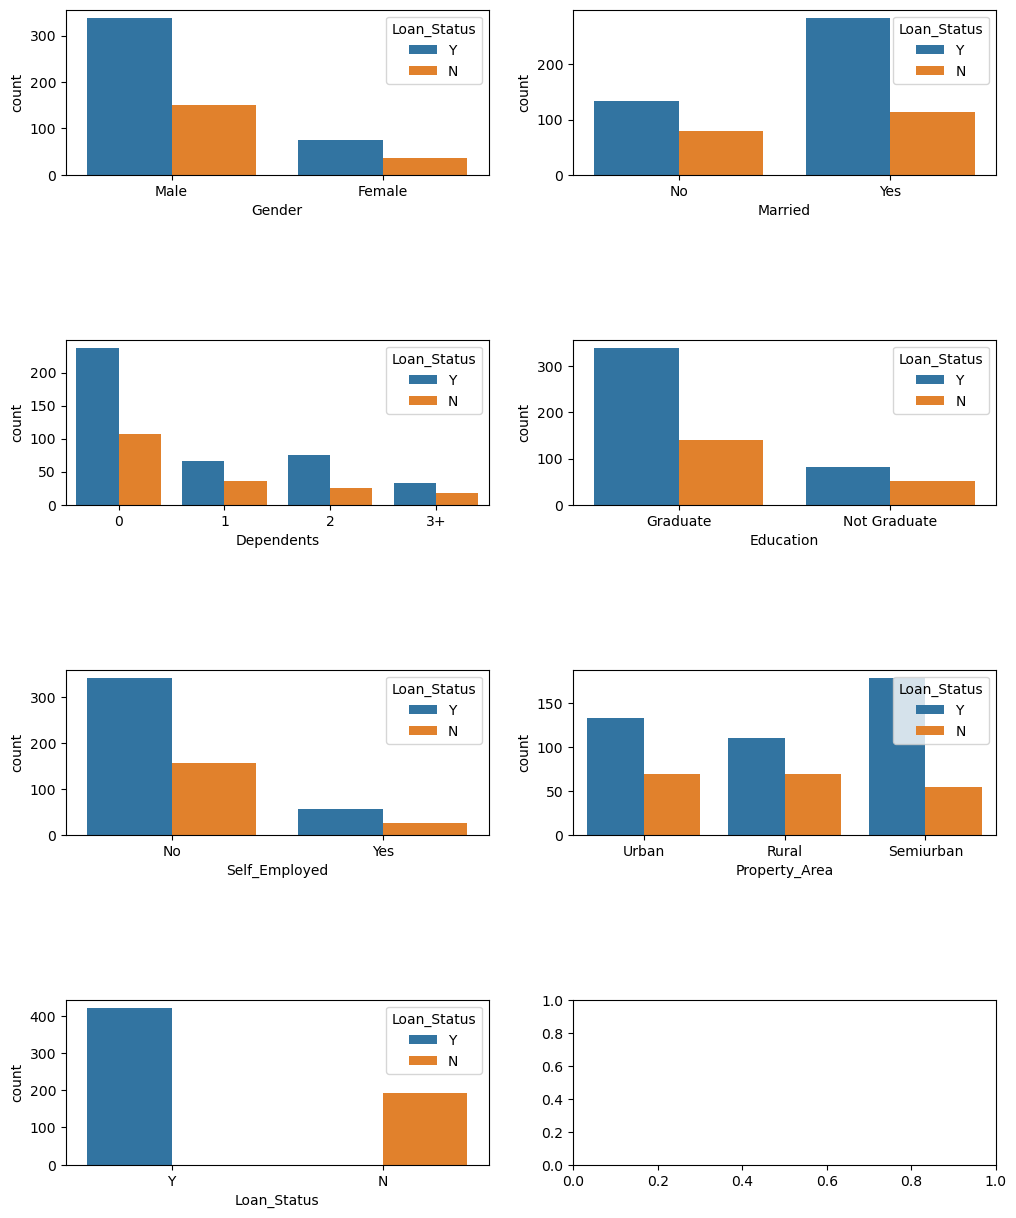

In [16]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_features_train):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train,hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

<b>Plots above convey following things about the dataset:</b>
<p>
1)Loan Approval Status: About 2/3rd of applicants have been granted loan.
   <p>
2)Sex: There are more Men than Women (approx. 3x)
       <p>
3)Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
</p><p>
4)Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
</p><p>
5)Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
</p><p>
6)Employment: 5/6th of population is not self employed.
    </p><p>
7)Property Area: More applicants from Semi-urban and also likely to be granted loans.
    </p><p>
8)Applicant with credit history are far more likely to be accepted.
    </p><p>
9)Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).
    </p>

# Feature Engineering

In [17]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [18]:
test.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [19]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Checking null values

<Axes: >

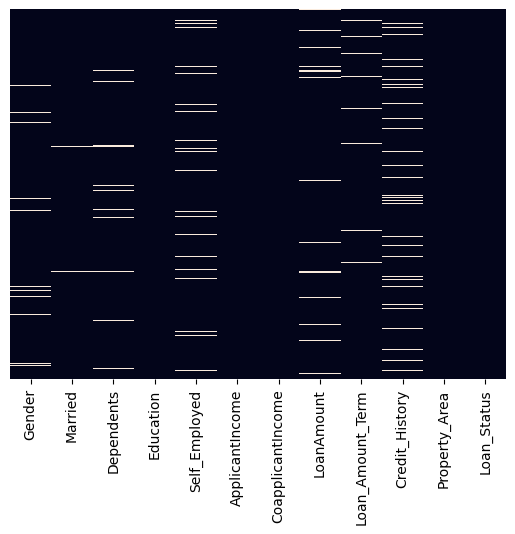

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [17]:
print("Train Data Categorical Objects")
print()
categorical_features_train = (train.select_dtypes(include=['object']).columns)
for categorical_features_train in train:
    if(train[categorical_features_train].isnull().sum()>0):
        print(categorical_features_train,"=",train[categorical_features_train].isnull().sum())

Train Data Categorical Objects

Gender = 13
Married = 3
Dependents = 15
Self_Employed = 32
LoanAmount = 22
Loan_Amount_Term = 14
Credit_History = 50


In [22]:
print("Test-Data Categorical Objects")
print()
categorical_features_test = (test.select_dtypes(include=['object']).columns)
for categorical_features_test in test:
    if(test[categorical_features_test].isnull().sum()>0):
        print(categorical_features_test,"=",test[categorical_features_test].isnull().sum())

Test-Data Categorical Objects

Gender = 11
Dependents = 10
Self_Employed = 23
LoanAmount = 5
Loan_Amount_Term = 6
Credit_History = 29


In [23]:
#filling all the continuous variables
train.fillna(train.mean(),inplace=True)

In [24]:
#filling all the categorical variables
train['Gender']=train['Gender'].fillna(train['Gender'].mode()[0])
train['Married']=train['Married'].fillna(train['Married'].mode()[0])
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed']=train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mode()[0])
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['Credit_History']=train['Credit_History'].fillna(train['Credit_History'].mode()[0])


In [25]:
#test data-set
test.fillna(test.mean(),inplace=True)
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])
test['Married']=test['Married'].fillna(test['Married'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mode()[0])
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mode()[0])

In [26]:
print("For Train Data-Set")
print()
for categorical_features_train in train:
    if(train[categorical_features_train].isnull().sum()>0):
        print(categorical_features_train,"=",train[categorical_features_train].isnull().sum())
    else:
        print("No Null Values")
        break

For Train Data-Set

No Null Values


In [27]:
print("For Test Data-Set")
print()
for categorical_features_test in test:
    if(test[categorical_features_test].isnull().sum()>0):
        print(categorical_features_test,"=",test[categorical_features_test].isnull().sum())
    else:
        print("No Null Values")
        break

For Test Data-Set

No Null Values


<Axes: >

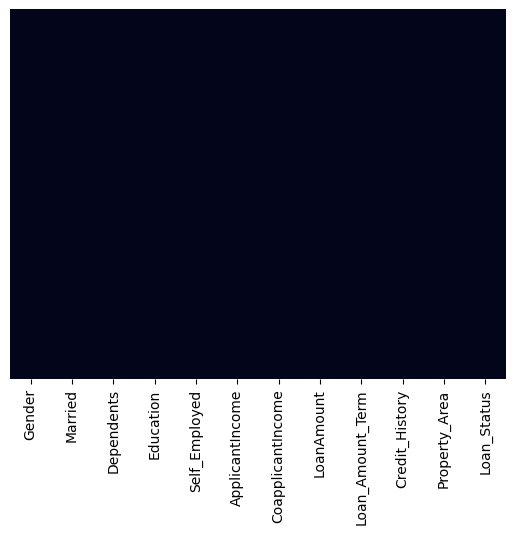

In [28]:
#In the below graph the white colour represent the null values
#we can see that Alley , poolIOC conitans more null vaules
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [29]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Handling Outliers

1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM--------                Not Sensitive To Outliers          
3. Linear Regression----------  Sensitive To Outliers
4. Logistic Regression-------   Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive 
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive 
10. PCA-------------------------- Sensitive 
11. Neural Networks-------------- Sensitive

{'whiskers': [<matplotlib.lines.Line2D at 0x2805c4ad360>,
 'caps': [<matplotlib.lines.Line2D at 0x2805c4ad8a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2805c4ad0c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2805c4adde0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2805c4ae080>],
 'means': []}

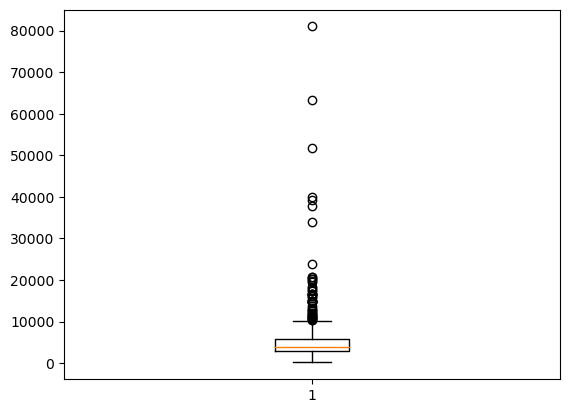

In [30]:
#ApplicantIncome-int64
plt.boxplot(train['ApplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2805c525fc0>,
 'caps': [<matplotlib.lines.Line2D at 0x2805c5263e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2805c525d20>],
 'medians': [<matplotlib.lines.Line2D at 0x2805c526920>],
 'fliers': [<matplotlib.lines.Line2D at 0x2805c526bc0>],
 'means': []}

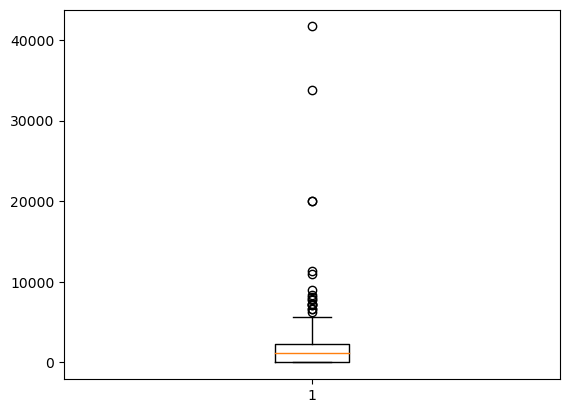

In [31]:
plt.boxplot(train['CoapplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2805c6c7f10>,
 'caps': [<matplotlib.lines.Line2D at 0x2805c6f8490>,
 'boxes': [<matplotlib.lines.Line2D at 0x2805c6c7c70>],
 'medians': [<matplotlib.lines.Line2D at 0x2805c6f8970>],
 'fliers': [<matplotlib.lines.Line2D at 0x2805c6f8c10>],
 'means': []}

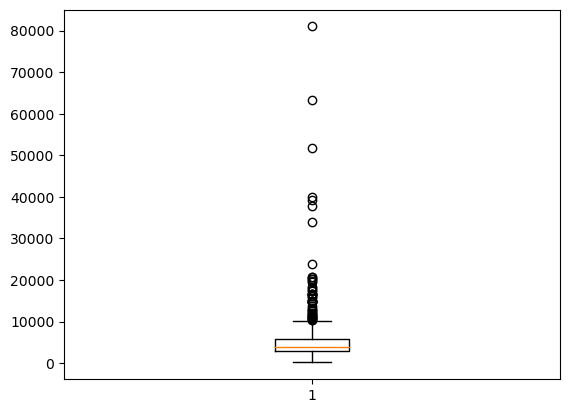

In [32]:
#LoanAmount           float64
plt.boxplot(train['ApplicantIncome'])

## Pairplot

â€¢	Plot pairwise relationships in a dataset. It is also possible to show a subset of variables or plot different variables on the rows and columns.

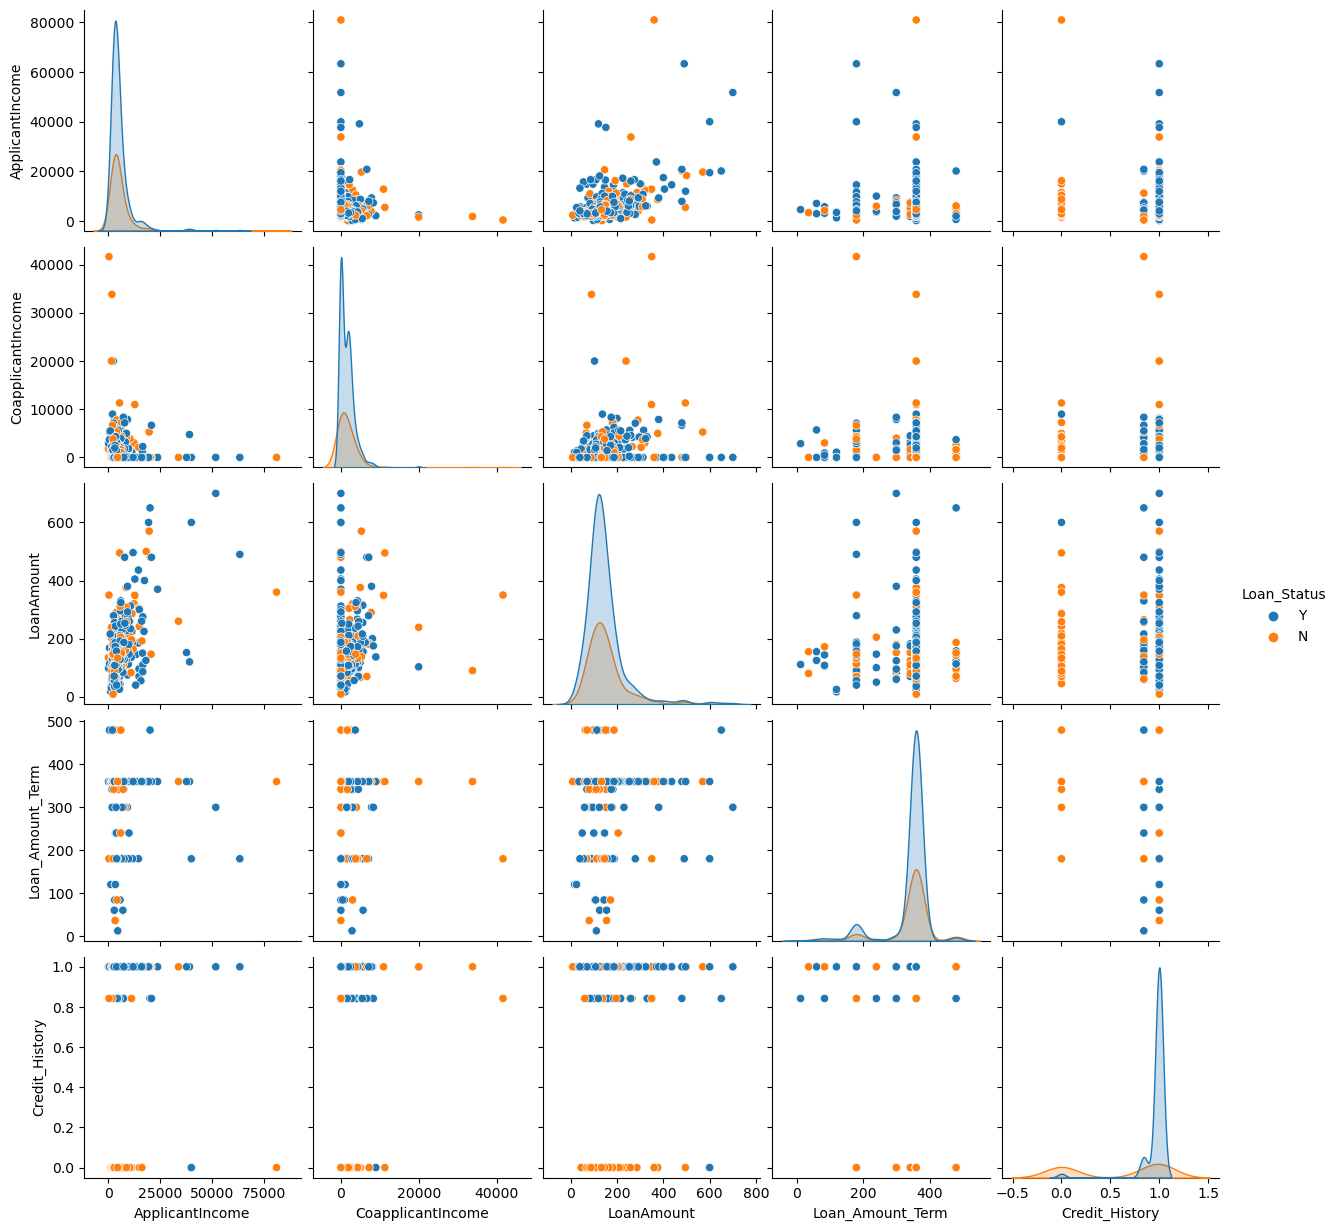

In [33]:
sns.pairplot(train,hue='Loan_Status')

By observing the above graphs we can say that there is a more overlapping betwen the 2 features .. so it's not better to use the logistic regression here it's better to use KNN 

In [34]:
##combining the train and test data-set
train_copy=train.copy()
test_copy=test.copy()
traintest=pd.concat([train,test],axis=0)
traintest.shape

(981, 12)

In [35]:
traintest.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

# Handling Categorical Variables

In [36]:
for i in traintest.select_dtypes(include=['object']).columns:
    print(i,"=",len(traintest[i].unique()))

Gender = 2
Married = 2
Dependents = 4
Education = 2
Self_Employed = 2
Property_Area = 3
Loan_Status = 3


In [37]:
traintest_copy=traintest.copy()
traintest = pd.get_dummies(traintest,drop_first=True)

In [38]:
traintest.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

In [39]:
traintest.shape

(981, 15)

In [36]:
traintest.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0             1.0            1            0             0             0   
1             1.0            1            1             1             0   
2             1.0            1            1             0             0   
3             1.0            1            1             0             0   
4             1.0            1            0             0             0   

   Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0              0                       0                  0   
1              0                       0                  0   
2              0                       0                  1   
3              0                       1                  0   
4              0                       0                  0   

   Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  
0                        0                    1              1  
1                        0                    0              0  
2                        0                    1              1  
3                        0                    1              1  
4                        0                    1              1

In [40]:
train.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [41]:
traintest.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Male                  uint8
Married_Yes                  uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Not Graduate       uint8
Self_Employed_Yes            uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Loan_Status_Y                uint8
dtype: object

In [42]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [43]:
#Splitting the data set
train=traintest.iloc[:614]
test=traintest.iloc[614:,:]

In [44]:
(train.shape),(test.shape)

((614, 15), (367, 15))

<Axes: title={'center': 'Pearson Correlation of Features'}>

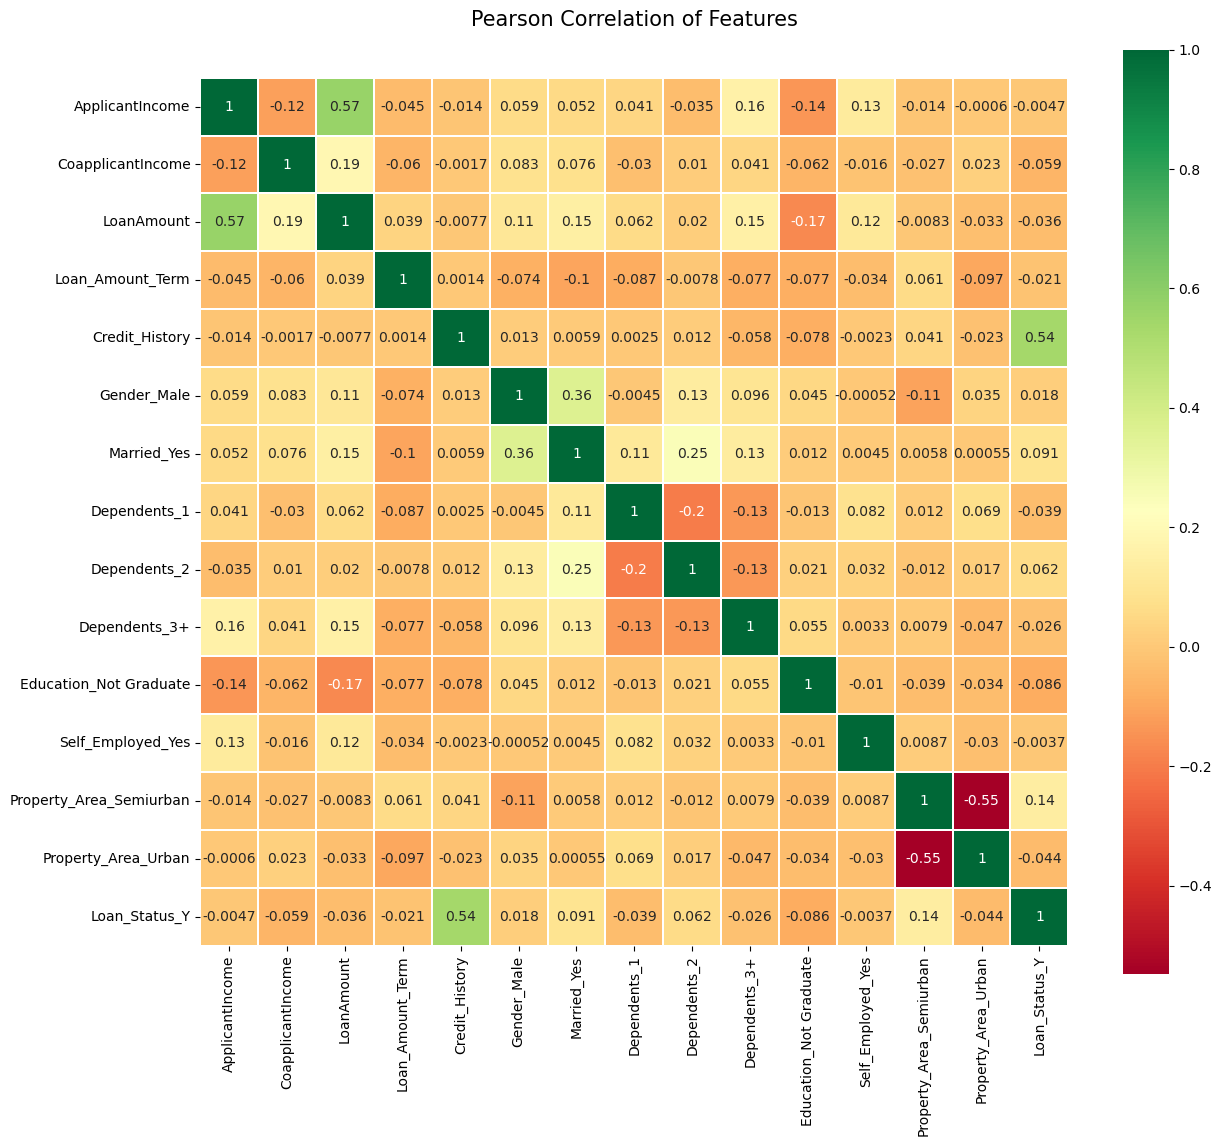

In [45]:
#checking co-realtion
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='RdYlGn', linecolor='white', annot=True)

In [46]:
train.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0             1.0            1            0             0             0   
1             1.0            1            1             1             0   
2             1.0            1            1             0             0   
3             1.0            1            1             0             0   
4             1.0            1            0             0             0   

   Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0              0                       0                  0   
1              0                       0                  0   
2              0                       0                  1   
3              0                       1                  0   
4              0                       0                  0   

   Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  
0                        0                    1              1  
1                        0                    0              0  
2                        0                    1              1  
3                        0                    1              1  
4                        0                    1              1

In [47]:
train.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

In [48]:
test.drop(['Loan_Status_Y'],axis=1,inplace=True)

In [49]:
X = train.drop(columns='Loan_Status_Y')
y = train['Loan_Status_Y']



# Using CV

In [50]:
from sklearn.model_selection import cross_val_score
def cv(model,cv=10):
    cvx= np.sqrt(cross_val_score(model, X, y, scoring="accuracy", cv=10))
    return(cvx)

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
print("Train Accuracy =",cv(log_classifier, cv=10).mean())

Train Accuracy = 0.8921531795435378


In [52]:
log_classifier.fit(X,y)
pred=log_classifier.predict(test)
print("Test Accuracy =",pred.mean())

Test Accuracy = 0.8337874659400545


## K-Nearest Neighbours

In [53]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier(n_neighbors=18)
print("Train Accuracy =",cv(k).mean())

Train Accuracy = 0.8200728048786399


In [54]:
k.fit(X,y)
knn_pred=k.predict(test)
print("Test Accuracy =",knn_pred.mean())

Test Accuracy = 0.9237057220708447


## Decision Trees

In [55]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(random_state=0,max_depth=3)
cv(tree_classifier,cv=10).mean()

0.897765640443222

In [56]:
tree_classifier.fit(X,y)
tree_pred=tree_classifier.predict(test)
tree_pred.mean()

0.8283378746594006

## Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
random_classifier = RandomForestClassifier(n_estimators=40,max_depth=3)
print("Train Accuracy =",cv(random_classifier, cv=10).mean())

Train Accuracy = 0.897765640443222


In [58]:
random_classifier.fit(X,y)
random_pred=random_classifier.predict(test)
print("Test Accuracy =",random_pred.mean())

Test Accuracy = 0.8392370572207084


[Text(0.5769230769230769, 0.875, 'x[1] <= 9650.5\ngini = 0.421\nsamples = 379\nvalue = [185, 429]'),
 Text(0.3076923076923077, 0.625, 'x[3] <= 420.0\ngini = 0.414\nsamples = 373\nvalue = [177, 427]'),
 Text(0.15384615384615385, 0.375, 'x[0] <= 19607.0\ngini = 0.411\nsamples = 368\nvalue = [173, 426]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.405\nsamples = 362\nvalue = [167, 424]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.375\nsamples = 6\nvalue = [6, 2]'),
 Text(0.46153846153846156, 0.375, 'x[4] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.8461538461538461, 0.625, 'x[6] <= 0.5\ngini = 0.32\nsamples = 6\nvalue = [8, 2]'),
 Text(0.7692307692307693, 0.375, 'x[1] <= 26918.5\ngini = 0.48\nsamples = 3\nvalue = [3, 2]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(0.846153846153

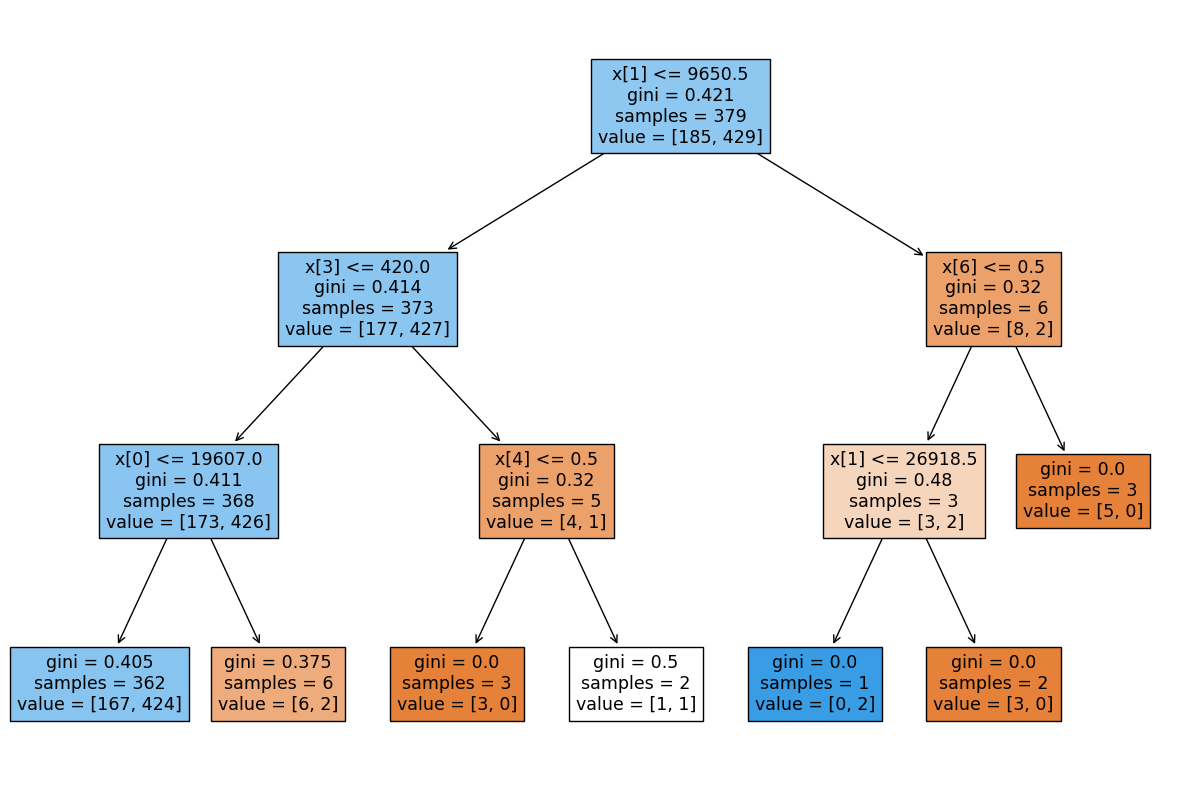

In [59]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(random_classifier.estimators_[10-1],filled=True) 

## SVM

In [60]:
from sklearn.svm import SVC
svm_classifier =SVC()
print("Train Accuracy =",cv(svm_classifier, cv=10).mean())

Train Accuracy = 0.8290343746340472


In [61]:
svm_classifier.fit(X,y)
svm_pred=svm_classifier.predict(test)
print("Test Accuracy =",svm_pred.mean())

Test Accuracy = 1.0


## AdaBoost

In [62]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier(learning_rate=0.5)
cv(ada_classifier,cv=10).mean()

0.8940568173117258

In [63]:
ada_classifier.fit(X,y)
ada_pred=ada_classifier.predict(test)
ada_pred.mean()

0.8147138964577657

## Gradient Boost

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=50, max_features=2)
cv(gb,cv=10).mean()

0.8968273633210029

In [65]:
gb.fit(X,y)
gb_pred=gb.predict(test)
gb_pred.mean()

0.8283378746594006

# Using Tensorflow

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
import pandas as pd

In [ ]:
import tensorflow as tf

In [ ]:
train1=pd.read_csv("train.csv")

In [ ]:
train1.head()

In [ ]:
train1.isnull().sum()

## Handling Categorical Features

In [ ]:
from sklearn.preprocessing import LabelEncoder
train1.iloc[:,0] = LabelEncoder().fit_transform(train1.iloc[:,0].astype('str'))
train1.iloc[:,1] = LabelEncoder().fit_transform(train1.iloc[:,1].astype('str'))
train1.iloc[:,2] = LabelEncoder().fit_transform(train1.iloc[:,2].astype('str'))
train1.iloc[:,3] = LabelEncoder().fit_transform(train1.iloc[:,3].astype('str'))
train1.iloc[:,4] = LabelEncoder().fit_transform(train1.iloc[:,4].astype('str'))
train1.iloc[:,5] = LabelEncoder().fit_transform(train1.iloc[:,5].astype('str'))
train1.iloc[:,11] = LabelEncoder().fit_transform(train1.iloc[:,11].astype('str'))
train1.iloc[:,12] = LabelEncoder().fit_transform(train1.iloc[:,12].astype('str'))

In [ ]:
train1.shape

In [ ]:
train1.head()

In [ ]:
train1.shape

In [ ]:
train1.isnull().sum()

In [ ]:
import numpy as np
train1['LoanAmount'].replace(np.NaN, train1['LoanAmount'].mean())
train1['Loan_Amount_Term'].replace(np.NaN, train1['Loan_Amount_Term'].mean())

In [ ]:
train1= train1.dropna()
train1.isnull().sum()

In [ ]:
dataset=train1.values
pd.DataFrame(dataset)

## Scaling Features

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
pd.DataFrame(X_scale)

## Splitting Our Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)

In [ ]:
pd.DataFrame(X_train)

In [ ]:
x_val, X_test, y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_test.shape, x_val.shape, Y_train.shape, Y_test.shape, y_val.shape)

In [ ]:
#the word dense is used to define a layer of connected neurons here we use 3 layers and input_shape refers the number of
#inputs we are using


model = Sequential([Dense(32, activation='relu', input_shape=(14,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
hist=model.fit(X_train,Y_train, 
          batch_size = 32, epochs = 100,
        validation_data = (x_val,y_val))

In [ ]:
model.evaluate(X_test,Y_test)[1]